In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [127]:
movie_data = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [129]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [131]:
movie_data.shape

(15509, 10)

In [133]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [135]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


<Axes: >

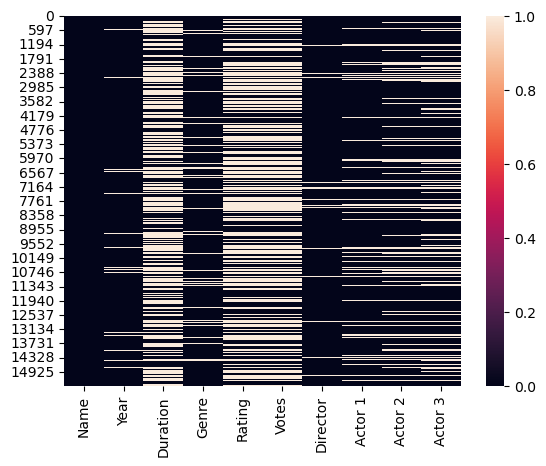

In [137]:
sns.heatmap(movie_data.isnull())

In [139]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [141]:
movie_data.duplicated().sum()

6

In [143]:
movie_data.dropna(inplace=True)

In [145]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [147]:
movie_data.drop_duplicates(inplace=True)

In [149]:
movie_data.shape

(5659, 10)

In [151]:
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [153]:
movie_data['Year']

1        (2019)
3        (2019)
5        (1997)
6        (2005)
8        (2012)
          ...  
15493    (2015)
15494    (2001)
15503    (1989)
15505    (1999)
15508    (1998)
Name: Year, Length: 5659, dtype: object

In [155]:
movie_data['Year']=movie_data['Year'].str.replace(r'[()]', ' ', regex=True).astype(int)

In [157]:
movie_data["Year"]

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int32

In [159]:
movie_data['Duration']=movie_data['Duration'].str.replace('min', ' ').astype(int)

In [161]:
movie_data['Duration']

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int32

In [163]:
movie_data['Genre']=movie_data['Genre'].str.split(', ')
movie_data=movie_data.explode('Genre')
movie_data["Genre"].fillna(movie_data["Genre"].mode()[0])

1          Drama
3         Comedy
3        Romance
5         Comedy
5          Drama
          ...   
15503      Drama
15505     Action
15505      Drama
15508     Action
15508      Drama
Name: Genre, Length: 11979, dtype: object

In [165]:
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'].str.replace(',', ''))


In [167]:
movie_data['Votes']

1          8
3         35
3         35
5        827
5        827
        ... 
15503     44
15505    655
15505    655
15508     20
15508     20
Name: Votes, Length: 11979, dtype: int64

In [169]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int32  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 935.9+ KB


In [171]:
movie_data.describe()

,Year,Duration,Rating,Votes
count,11979.000000,11979.000000,11979.000000,11979.000000
mean,1996.099174,135.871024,5.879356,3335.405293
std,19.314008,25.012586,1.374243,15305.935731
min,1931.000000,21.000000,1.100000,5.000000
25%,1982.000000,120.000000,5.000000,41.000000
50%,2001.000000,137.000000,6.100000,213.000000
75%,2012.000000,152.000000,6.900000,1469.000000
max,2021.000000,321.000000,10.000000,591417.000000


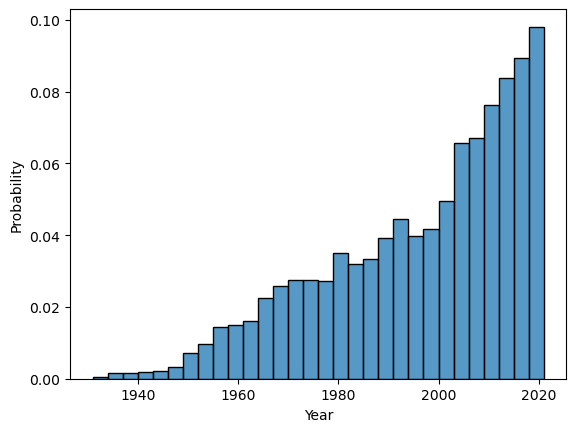

In [173]:
year = sns.histplot(data=movie_data, x='Year', stat='probability', bins=30)
plt.show()

In [175]:
avg_rating_by_year= movie_data.groupby(['Year','Genre'])['Rating'].mean().reset_index()
avg_rating_by_year

,Year,Genre,Rating
0,1931,Drama,5.750000
1,1931,Fantasy,6.200000
2,1932,Musical,6.000000
3,1932,Romance,6.000000
4,1933,Drama,6.200000
...,...,...,...
1077,2021,Mystery,5.500000
1078,2021,Romance,6.336364
1079,2021,Sci-Fi,9.300000
1080,2021,Sport,5.400000


In [177]:
#top 10 genres
top_genres=movie_data['Genre'].value_counts().head(10).index
top_genres

Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Mystery', 'Adventure'],
      dtype='object', name='Genre')

In [179]:
average_rating_by_year= avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]
average_rating_by_year

,Year,Genre,Rating
0,1931,Drama,5.750000
2,1932,Musical,6.000000
3,1932,Romance,6.000000
4,1933,Drama,6.200000
5,1933,Romance,6.200000
...,...,...,...
1071,2021,Family,7.375000
1076,2021,Musical,4.100000
1077,2021,Mystery,5.500000
1078,2021,Romance,6.336364


In [181]:
fig=px.line(average_rating_by_year, x='Year', y='Rating',  color="Genre")

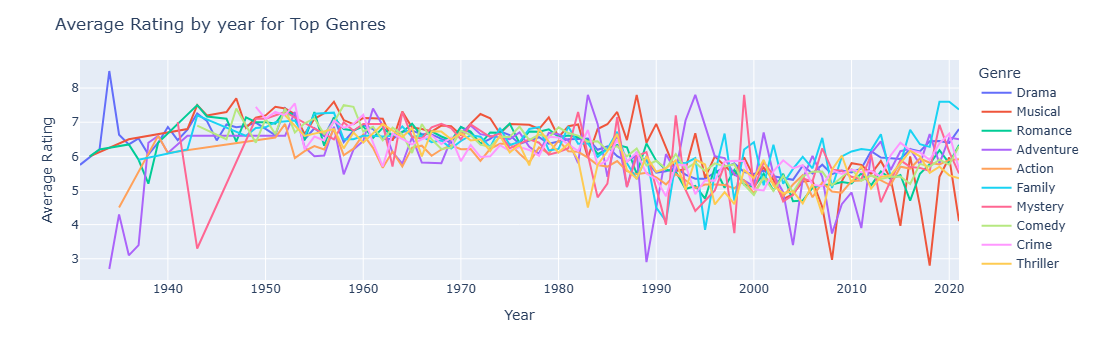

In [183]:
fig.update_layout(title='Average Rating by year for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')
fig.show()

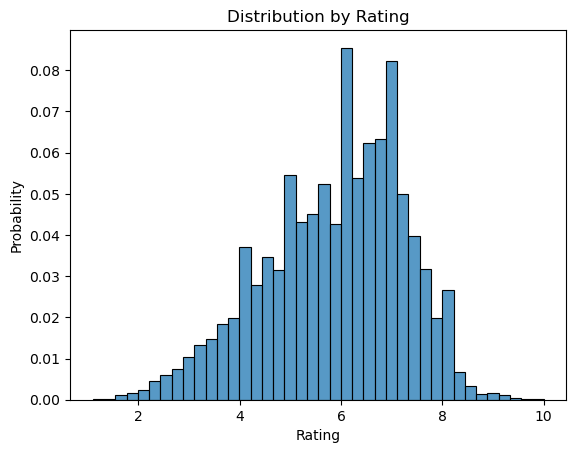

In [185]:
year = sns.histplot(data=movie_data, x='Rating', stat='probability', bins=40)
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title('Distribution by Rating')
plt.show()
plt.show()

In [186]:
#importing libraries for mode building
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [187]:
movie_data.drop('Name', axis=1, inplace= True)

In [191]:
#Grouping the columns with their average rating and then creating a new feature

genre_mean_rating= movie_data.groupby('Genre')['Rating'].transform('mean')
movie_data['Genre_mean_rating']= genre_mean_rating

director_mean_rating= movie_data.groupby('Director')['Rating'].transform('mean')
movie_data['Director_encoded']= director_mean_rating

actor1_mean_rating= movie_data.groupby('Actor 1')['Rating'].transform('mean')
movie_data['Actor1_encoded']=actor1_mean_rating

actor2_mean_rating= movie_data.groupby('Actor 2')['Rating'].transform('mean')
movie_data['Actor2_encoded']=actor2_mean_rating

actor3_mean_rating= movie_data.groupby('Actor 3')['Rating'].transform('mean')
movie_data['Actor3_encoded']=actor3_mean_rating

In [192]:
# keeping the predictor and target variable

X= movie_data[['Year', 'Votes', 'Duration', "Genre_mean_rating", 'Director_encoded', "Actor1_encoded", "Actor2_encoded", "Actor3_encoded"]]
y= movie_data['Rating']

In [213]:
#Splitting the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [215]:
X_train

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
4713,2021,26,84,6.056744,6.800000,6.800000,6.800000,6.800000
12223,2002,18,150,5.520463,6.700000,6.700000,6.700000,6.700000
302,1984,65,157,5.520463,5.579167,6.575281,6.417544,6.784615
4208,1949,31,133,6.246845,6.654545,6.500000,6.500000,7.220000
6915,1990,129,103,5.820114,5.774713,5.730769,5.688462,5.387500
...,...,...,...,...,...,...,...,...
15490,1998,268,157,5.630044,4.394737,5.025547,4.964000,5.727273
6469,1990,19,90,6.056744,5.708333,6.575281,5.600000,6.142308
6770,1992,22147,174,5.811087,7.270000,6.867778,5.042105,6.358824
979,1973,278,125,6.246845,6.547059,6.635088,7.082857,6.323077


In [217]:
y_train

4713     6.8
12223    6.7
302      5.8
4208     6.5
6915     5.6
        ... 
15490    4.3
6469     5.3
6770     8.2
979      7.1
9219     3.5
Name: Rating, Length: 9583, dtype: float64

## Model Building 

In [198]:
# Building machine learning model and training them
Model= LinearRegression()
Model.fit(X_train,y_train)
Model_pred=Model.predict(X_test)

In [200]:
# Evaluting the performance of model with evalution metrics
print('The performance evaluation of logistic regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, Model_pred))
print('R2 score: ', r2_score(y_test, Model_pred))

The performance evaluation of logistic regression is below:  

Mean squared error:  0.4465441653985704
Mean absolute error:  0.49219025407656397
R2 score:  0.7641133663863862


## Model Testing

In [203]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [205]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [219]:
# For testng, We created a new dataframe with the values close to the any of our existing data to evaluate.

data={'Year': [2019], 'Votes':[8], 'Duration': [109], 'Genre_mean_rating': [6.056744], 'Director_encoded': [7.000000], 'Actor1_encoded':[6.850000],'Actor2_encoded':[7.00], 'Actor3_encoded':[7.00]}
trail= pd.DataFrame(data)

In [221]:
rating_predicted =Model.predict(trail)

print("Predicted Rating: ", rating_predicted[0])

Predicted Rating:  7.238868271047665
